In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df=pd.read_csv("./Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


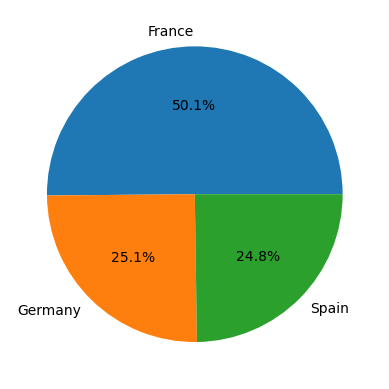

In [8]:
labels=['France', 'Germany', 'Spain']
plt.pie(df['Geography'].value_counts(), autopct='%0.1f%%', labels=labels)
plt.show()

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

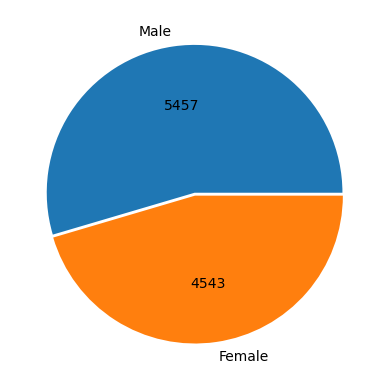

In [10]:
labels=['Male', 'Female']
explode=(0.01, 0.01)
total=df['Gender'].value_counts().sum()
plt.pie(df['Gender'].value_counts(), autopct=lambda x: '{:.0f}'.format(x*total/100), labels=labels, explode=explode)
plt.show()

In [11]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

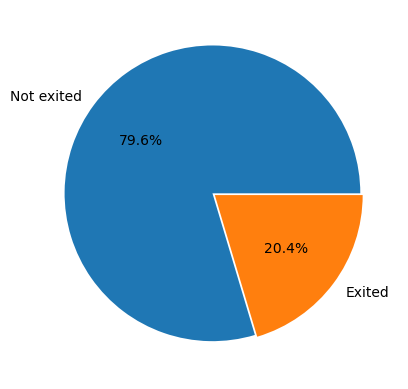

In [12]:
labels=['Not exited', 'Exited']
explode=(0.01, 0.01)
plt.pie(df['Exited'].value_counts(), autopct='%0.01f%%', labels=labels, explode=explode)
plt.show()

### Highly imabalanced dataset

### Therefore, accuracy should not be the metric to be relied on. Have to focus on Precision, Recall and F1 score

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
df=pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first='True')

In [18]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
X=df.drop(columns=['Exited'])
y=df['Exited']

### Splitting the dataset

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (8000, 11)
X_test (2000, 11)
y_train (8000,)
y_test (2000,)


### Using Standard Scaler to scale the values

In [22]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Logistic Regression

In [23]:
log_model=LogisticRegression()

In [24]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred=log_model.predict(X_test)

### Classification report of Logistic Regression

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [27]:
cm=confusion_matrix(y_test, y_pred)

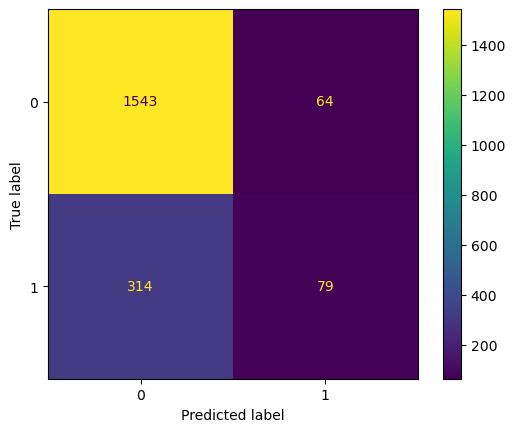

In [28]:
display=ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

### Let's work with the imbalanced dataset and then check the scores

### To deal with highly imbalanced dataset, we have the following options:
1. Undersampling
2. Oversampling
3. SMOTE analysis
4. Boosting algorithms

### 1. Undersampling

In [30]:
rus=RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled=rus.fit_resample(X_train, y_train)

### Initial counts

In [37]:
y_train.value_counts()

0    6356
1    1644
Name: Exited, dtype: int64

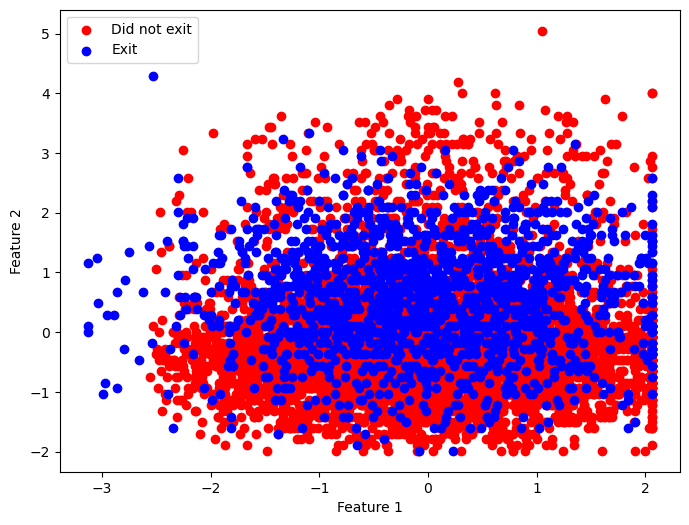

In [83]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], label='Did not exit', color='red')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], label='Exit', color='blue')
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### After undersampling

In [38]:
y_undersampled.value_counts()

0    1644
1    1644
Name: Exited, dtype: int64

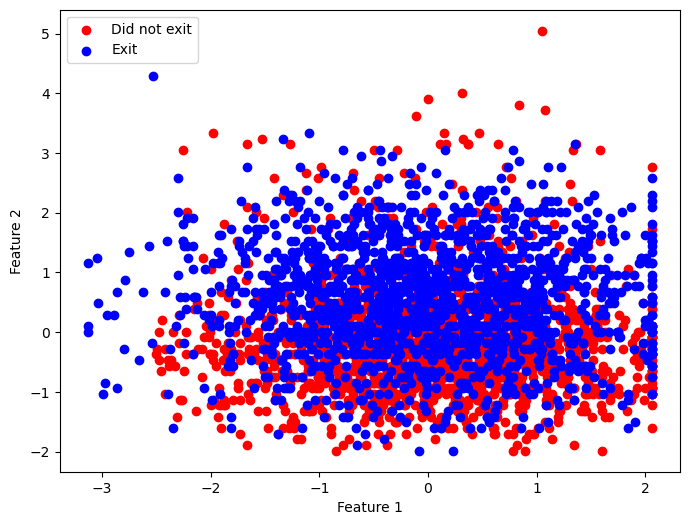

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(X_undersampled[y_undersampled==0][:, 0], X_undersampled[y_undersampled==0][:, 1], label='Did not exit', color='red')
plt.scatter(X_undersampled[y_undersampled==1][:, 0], X_undersampled[y_undersampled==1][:, 1], label='Exit', color='blue')
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [39]:
log_model.fit(X_undersampled, y_undersampled)

LogisticRegression()

In [51]:
y_pred=log_model.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.39      0.72      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.72      0.75      2000



### After undersampling, the precision has increased from 0.78 to 0.81 but the recall score has decreased to 0.72

### Advantages of Undersampling:
    1. Reduction in bias
    2. Faster computation
### Disadvantages
    1. Information loss

### 2. Oversampling

In [59]:
ros=RandomOverSampler(random_state=42)
X_oversampled, y_oversampled=ros.fit_resample(X_train, y_train)

### Initial counts

In [62]:
y_train.value_counts()

0    6356
1    1644
Name: Exited, dtype: int64

### After oversampling

In [61]:
y_oversampled.value_counts()

0    6356
1    6356
Name: Exited, dtype: int64

In [63]:
log_model.fit(X_oversampled, y_oversampled)

LogisticRegression()

In [64]:
y_pred=log_model.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.72      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.74      2000



### Advatages of Oversampling:
    1. Reduced bias
### Disadvantages:
    1. Overfitting because of duplicate values
    2. Increased size

### 3. SMOTE (Synthetic Minority Over Sampling technique)

In [68]:
smote=SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote=smote.fit_resample(X_train, y_train)

### Initial counts

In [69]:
y_train.value_counts()

0    6356
1    1644
Name: Exited, dtype: int64

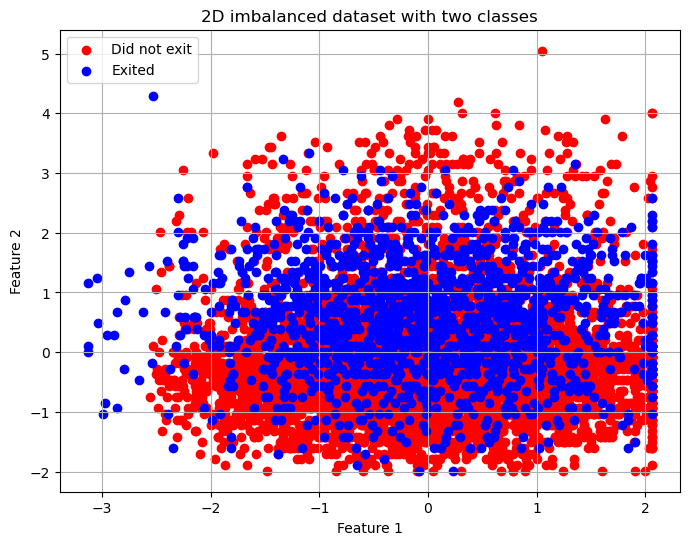

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='red', label='Did not exit')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='blue', label='Exited')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid("True")
plt.legend()
plt.title("2D imbalanced dataset with two classes")
plt.show()

### After SMOTE

In [71]:
y_resampled_smote.value_counts()

0    6356
1    6356
Name: Exited, dtype: int64

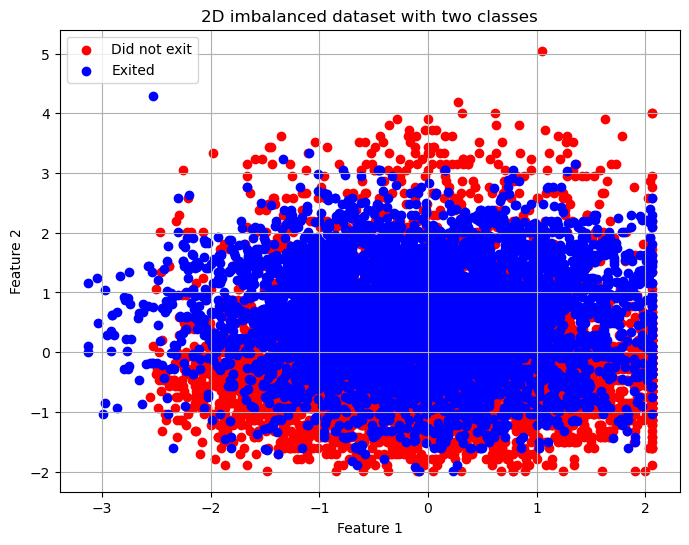

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled_smote[y_resampled_smote==0][:, 0], X_resampled_smote[y_resampled_smote==0][:, 1], color='red', label='Did not exit')
plt.scatter(X_resampled_smote[y_resampled_smote==1][:, 0], X_resampled_smote[y_resampled_smote==1][:, 1], color='blue', label='Exited')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid("True")
plt.title("2D imbalanced dataset with two classes")
plt.show()

In [72]:
log_model.fit(X_resampled_smote, y_resampled_smote)

LogisticRegression()

In [73]:
y_pred=log_model.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.39      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000



### Advantages of SMOTE:
    1. Reduced bias
    2. No overfitting
### Disadvantages:
    1. Sensitive to outliers
    2. Computational complexity
    3. Does not handle categorical data well

In [102]:
rfc=RandomForestClassifier(random_state=42)

In [103]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [104]:
y_pred=rfc.predict(X_test)

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



### By far the best method to deal with imbalanced dataset
Achieved maximum value of precision and recall

In [112]:
forest_params={
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf':[1, 2, 4]
}

In [122]:
optimized_rfc=GridSearchCV(rfc, forest_params, cv=7)

In [123]:
optimized_rfc.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 150]})

In [124]:
optimized_rfc.best_params_

{'criterion': 'gini', 'min_samples_leaf': 4, 'n_estimators': 100}

In [125]:
optimized_rfc_model=RandomForestClassifier(n_estimators=100, min_samples_leaf=4, criterion='gini')

In [126]:
optimized_rfc_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4)

In [127]:
y_pred=optimized_rfc_model.predict(X_test)

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

